##行列式


### 1. 行列式の幾何学的意味
- 行列式は、線形変換後の平面の拡大縮小の度合いを表す量です。具体的には、基底ベクトル（基本ベクトル）が張る面積の変化量を示します。
- 2×2行列の行列式 $ \text{det}(A) = ad - bc $ は、その行列が表す変換後の平行四辺形の面積を示します。

### 2. 2×2行列の行列式の計算
- 行列 $ A = \begin{bmatrix} a & b \\ c & d \end{bmatrix} $ の行列式は、$ \text{det}(A) = ad - bc $ です。

### 3. 行列式の幾何学的解釈
- 行列 $ A $ を基底ベクトル $ \mathbf{i} = (1, 0) $ と $ \mathbf{j} = (0, 1) $ に適用すると、新しいベクトル $ \mathbf{u} = (a, c) $ と $ \mathbf{v} = (b, d) $ が得られ、これらが張る平行四辺形の面積が行列式になります。
- 平行四辺形 $ \text{A}\text{VOU} $ の面積は、行列 $ A $ の行列式 $ \text{det}(A) $ と一致します。

### 4. 行列の逆行列
- 行列の逆行列は、線形変換を元に戻す操作を表します。2×2行列の逆行列 $ A^{-1} $ は以下のように計算されます：
  $$
  A^{-1} = \frac{1}{\text{det}(A)} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
  $$
  これは、行列の変換で生じた面積の逆数を用いて元の空間に戻す操作と考えられます。

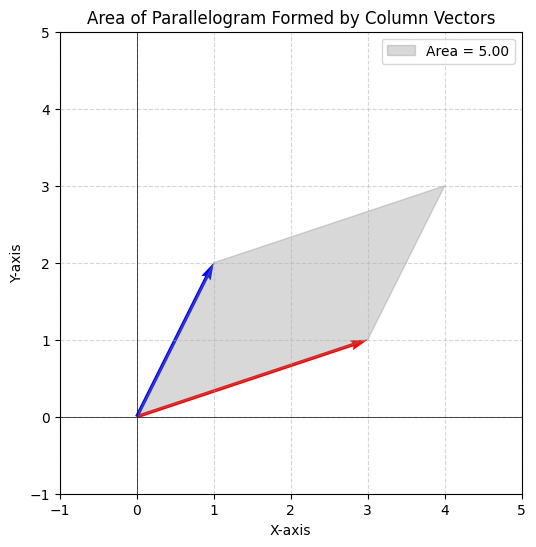

In [ ]:
# Correcting the plot error by adjusting the quiver function call
# Adjusting the origin format and vector inputs

# Create vectors that will form the columns of a matrix
import numpy as np
import matplotlib.pyplot as plt

v1 = np.array([3, 1])
v2 = np.array([1, 2])

# Form the matrix with v1 and v2 as columns
matrix = np.column_stack((v1, v2))

# Calculate the determinant of the matrix
det = np.linalg.det(matrix)

# Create vectors to plot
origin = np.array([[0, 0], [0, 0]])
vectors = np.array([v1, v2])

# Plotting the vectors and the parallelogram they form
plt.figure(figsize=(6, 6))
plt.quiver(*origin, vectors[:, 0], vectors[:, 1], angles='xy', scale_units='xy', scale=1, color=['r', 'b'])
plt.fill([0, v1[0], v1[0] + v2[0], v2[0]], [0, v1[1], v1[1] + v2[1], v2[1]], color='gray', alpha=0.3, label=f'Area = {abs(det):.2f}')

# Set plot limits
plt.xlim(-1, 5)
plt.ylim(-1, 5)

# Set grid and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Area of Parallelogram Formed by Column Vectors')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.show()


上図は、行列 $ A = \begin{bmatrix} 1 & 3 \\ 2 & 1 \end{bmatrix} $ の行列式の幾何学的な意味を表す図です。図に示されているように、行列式の幾何学的意味は2つの列ベクトルが成す平行四辺形の面積を表します。この例では、行列式の値は$-5$であり、その絶対値が平行四辺形の面積5となります。

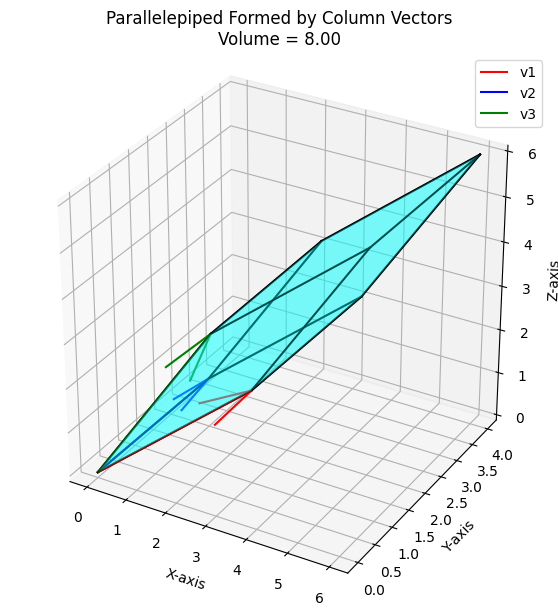

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Create vectors that will form the columns of a matrix
v1 = np.array([3, 1, 2])
v2 = np.array([1, 2, 1])
v3 = np.array([2, 1, 3])

# Form the matrix with v1, v2, and v3 as columns
matrix = np.column_stack((v1, v2, v3))

# Calculate the determinant of the matrix
det = np.linalg.det(matrix)

# Calculate the volume of the parallelepiped
volume = abs(det)

# Create origin and vertices of the parallelepiped
origin = np.array([0, 0, 0])
vertices = [
    origin,
    v1,
    v2,
    v3,
    v1 + v2,
    v1 + v3,
    v2 + v3,
    v1 + v2 + v3
]

# Define edges of the parallelepiped
edges = [
    [0, 1], [0, 2], [0, 3],
    [1, 4], [1, 5], [2, 4],
    [2, 6], [3, 5], [3, 6],
    [4, 7], [5, 7], [6, 7]
]

# Define faces of the parallelepiped using the vertices
faces = [
    [vertices[0], vertices[1], vertices[4], vertices[2]],  # Bottom face
    [vertices[0], vertices[1], vertices[5], vertices[3]],  # Side face 1
    [vertices[0], vertices[2], vertices[6], vertices[3]],  # Side face 2
    [vertices[1], vertices[4], vertices[7], vertices[5]],  # Side face 3
    [vertices[2], vertices[4], vertices[7], vertices[6]],  # Side face 4
    [vertices[3], vertices[5], vertices[7], vertices[6]]   # Top face
]

# 3D plot setup
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot vectors
ax.quiver(*origin, *v1, color='r', label='v1')
ax.quiver(*origin, *v2, color='b', label='v2')
ax.quiver(*origin, *v3, color='g', label='v3')

# Plot the parallelepiped faces
face_collection = Poly3DCollection(faces, color='cyan', alpha=0.3, edgecolor='black')
ax.add_collection3d(face_collection)

# Plot parallelepiped edges
for edge in edges:
    x_vals = [vertices[edge[0]][0], vertices[edge[1]][0]]
    y_vals = [vertices[edge[0]][1], vertices[edge[1]][1]]
    z_vals = [vertices[edge[0]][2], vertices[edge[1]][2]]
    ax.plot(x_vals, y_vals, z_vals, color='black')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title(f'Parallelepiped Formed by Column Vectors\nVolume = {volume:.2f}')

# Set equal aspect ratio
ax.set_box_aspect([1, 1, 1])

# Display legend
ax.legend()

# Display the plot
plt.show()

上図は、行列 $ A = \begin{bmatrix} 3 & 1 & 2 \\ 1 & 2 & 1 \\ 2 & 1 & 3 \end{bmatrix} $ の行列式の幾何学的な意味を表す図です。上記の図は、3次元空間で3つの列ベクトル
$$ \begin{bmatrix} 3 \\ 1 \\ 2 \end{bmatrix} , \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix} , \begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix} $$
が形成する平行六面体を視覚化したものです。これらのベクトルが構成する行列の行列式の絶対値が、平行六面体の体積に対応しています。図の中で赤、青、緑のベクトルが平行六面体の辺を形成しており、その体積が計算された行列式の値となっています。